|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# write your code here ^_^
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Q2: Read instagram_users.csv file

In [2]:
# write your code here ^_^
data=pd.read_csv("instagram_users.csv")
data.head()

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,fake


# Q3: Split tha dataset into training and testing

In [3]:
# write your code here ^_^
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

Decision Tree Accuracy: 0.851613572688596 

Decision Tree Confusion Matrix : 
 [[8123 1393]
 [1467 8291]]


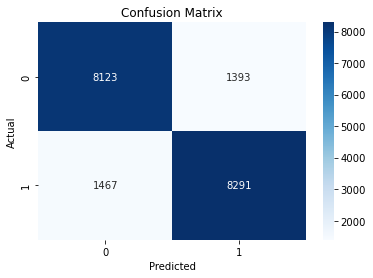

In [5]:
# write your code here ^_^
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)
pred=DecisionTree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, pred),"\n")
print("Decision Tree Confusion Matrix : \n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

C:\Users\ttsul\AppData\Local\Temp\ipykernel_5252\3513842659.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomF.fit(X_train, y_train)


Random Forest  Accuracy: 0.8973228183044516 

Random Forest Confusion Matrix : 
 [[7950 1566]
 [ 413 9345]]


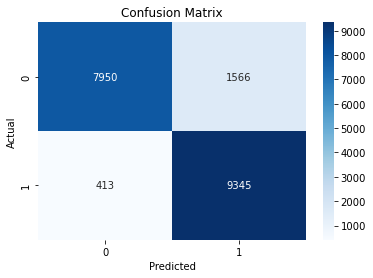

In [27]:
# write your code here ^_^
RandomF = RandomForestClassifier(n_estimators=100)
RandomF.fit(X_train, y_train)
pred = RandomF.predict(X_test)
print('Random Forest  Accuracy:', accuracy_score(y_test, pred),"\n")
print("Random Forest Confusion Matrix : \n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

C:\Users\ttsul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression  Accuracy: 0.8035176922278717 

Logistic Regression Confusion Matrix : 
 [[7456 2060]
 [1727 8031]]


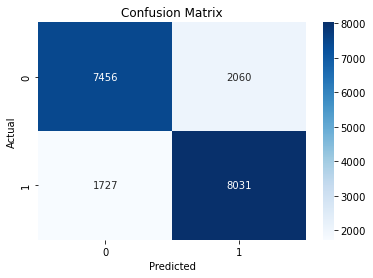

In [7]:
# write your code here ^_^
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)
pred = Logistic.predict(X_test)
print('Logistic Regression  Accuracy:', accuracy_score(y_test, pred),"\n")
print("Logistic Regression Confusion Matrix : \n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()